# Creating a subdataset

- As some individuals have much higher counts of combinations compared to all other individuals, we need to reduce the number of combinations for these individuals that will be used in the analysis. 

### Load dataframe

In [1]:
from tqdm.auto import tqdm

In [2]:
import avgn

In [3]:
import pandas as pd
from avgn.utils.paths import DATA_DIR, ensure_dir

In [4]:
DATASET_ID = "git_repos"

In [5]:
DT_ID = '2022-03-04_18-41-29'

In [6]:
seg_df = pd.read_pickle(DATA_DIR / DATASET_ID / DT_ID /  'walsh_magpie_gitrepos.pickle')
seg_df[:3]

start_time  end_time labels  ID  start_times  end_times call_label  \
0    0.753604  0.776773     DS   0     0.753604   0.776773     DSSHDS   
1    0.786865  0.835165     SH   1     0.786865   0.835165     DSSHDS   
2    0.855941  0.921160     DS   2     0.855941   0.921160     DSSHDS   

   call_start  seg_pos_call  call_unique_num  ...  indv indvi  \
0    0.753604             0                0  ...  MGGY     0   
1    0.753604             1                0  ...  MGGY     0   
2    0.753604             2                0  ...  MGGY     0   

                          filename  group  location sex  \
0  BWY MGGY Call Combo 1 290719 PM   BWYa   CRAWLEY   F   
1  BWY MGGY Call Combo 1 290719 PM   BWYa   CRAWLEY   F   
2  BWY MGGY Call Combo 1 290719 PM   BWYa   CRAWLEY   F   

                                             wav_loc  \
0  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
1  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
2  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   

                               key   rate  \
0  BWY MGGY Call Combo 1 290719 PM  44100   
1  BWY MGGY Call Combo 1 290719 PM  44100   
2  BWY MGGY Call Combo 1 290719 PM  44100   

                                               specs  
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  

[3 rows x 25 columns]

### First, lets look at the datasets of syllables for each animal

In [7]:
from avgn.visualization.spectrogram import draw_spec_set
import numpy as np
import matplotlib.pyplot as plt

BMYO 84


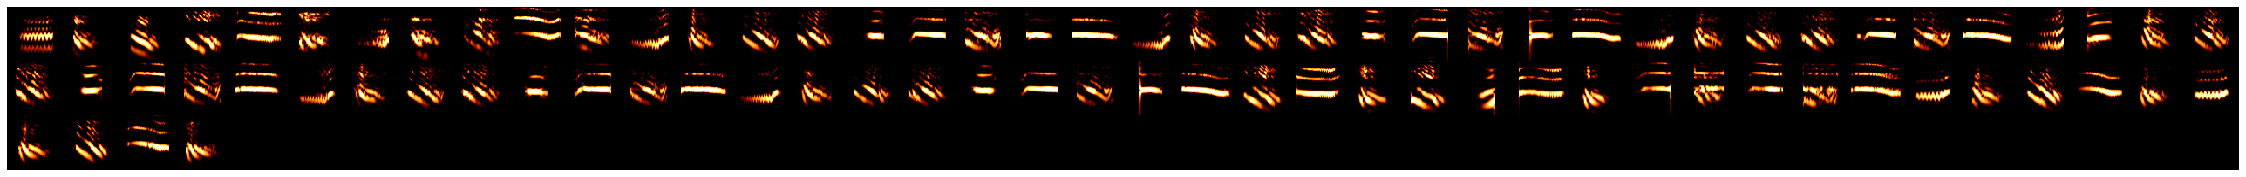

GBYM 79


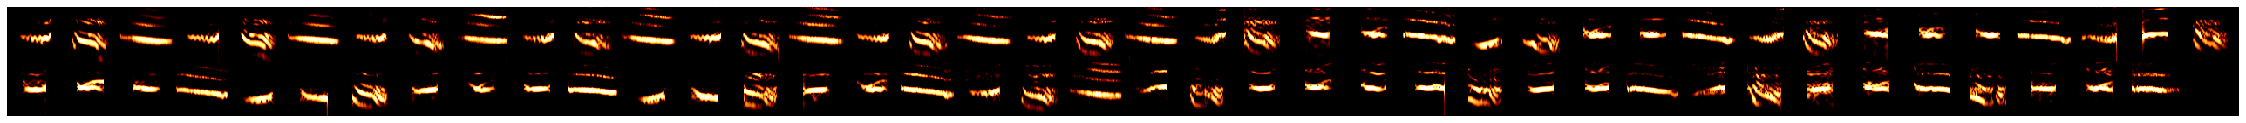

GON XF 19-21 36


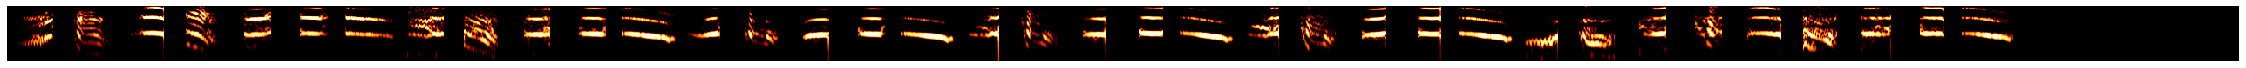

GON XM 20-21 10


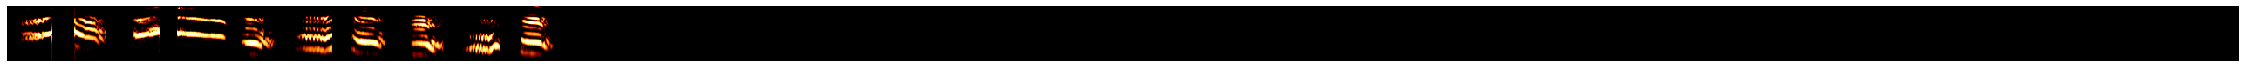

MGGY 79


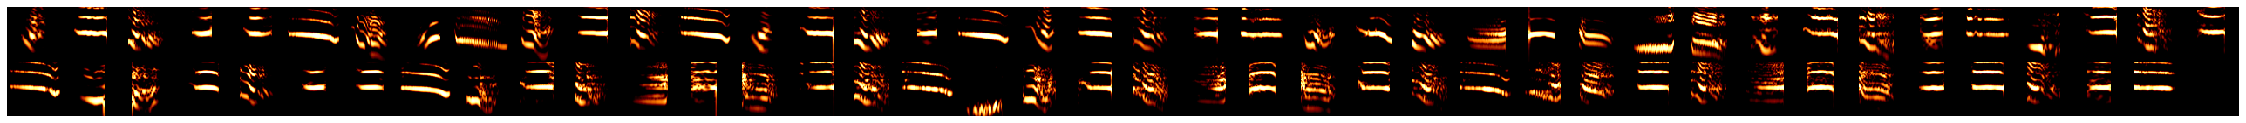

MOGO 104


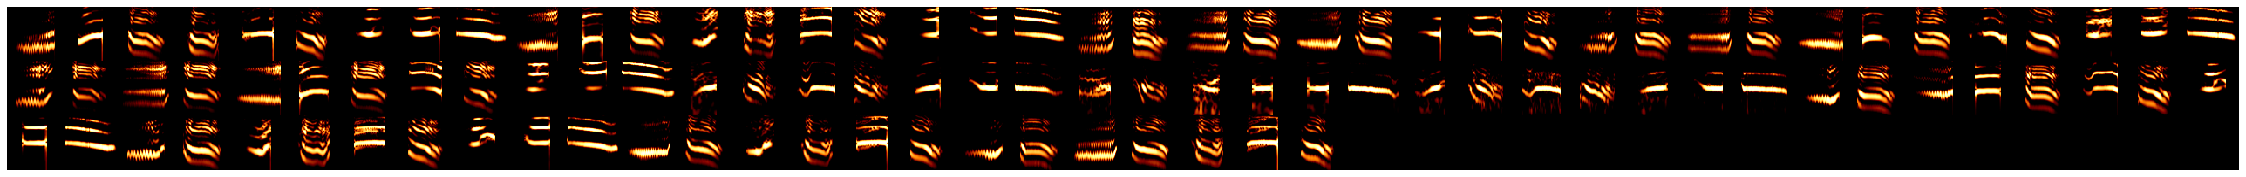

MOOO 29


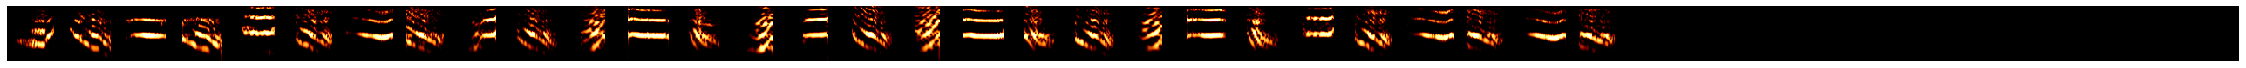

MORP 16


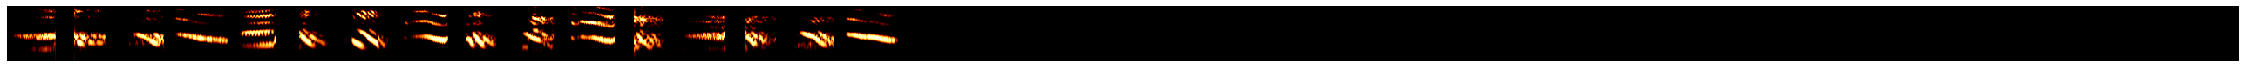

MOVY 20


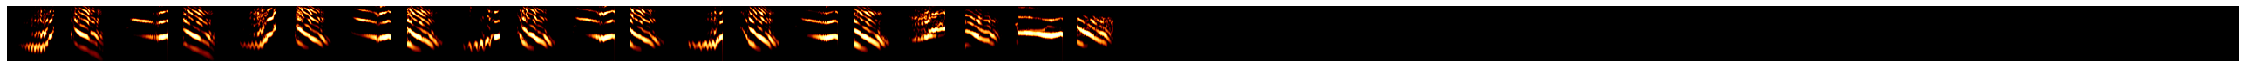

MRGO 125


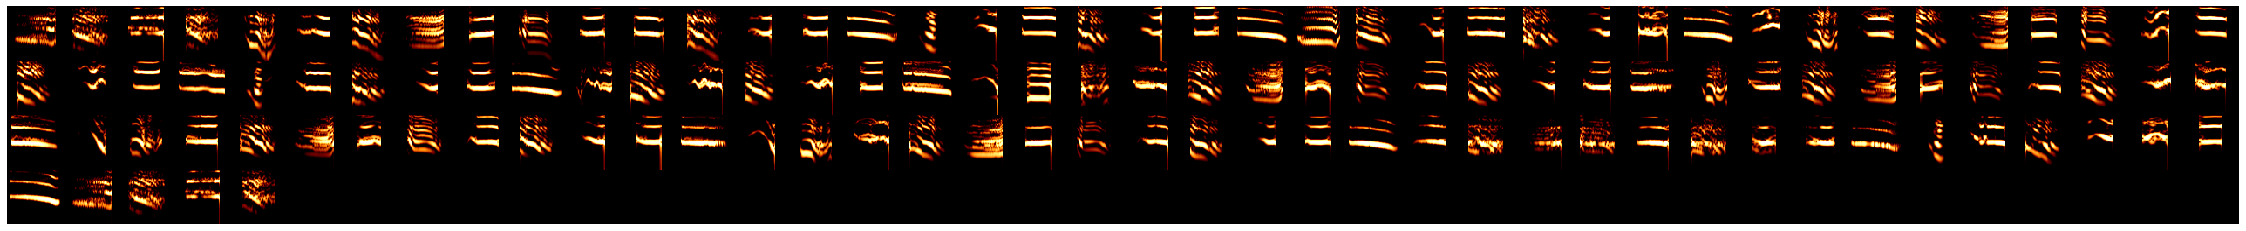

MXWW 43


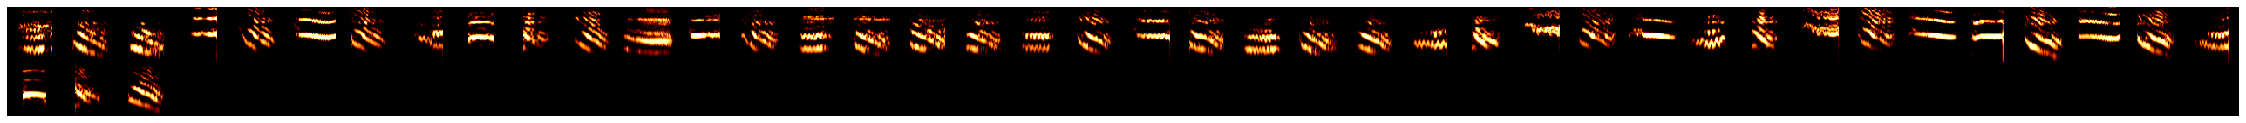

MXXBYX 3


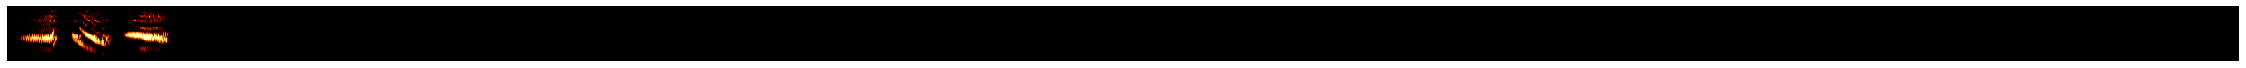

MXXGRY 102


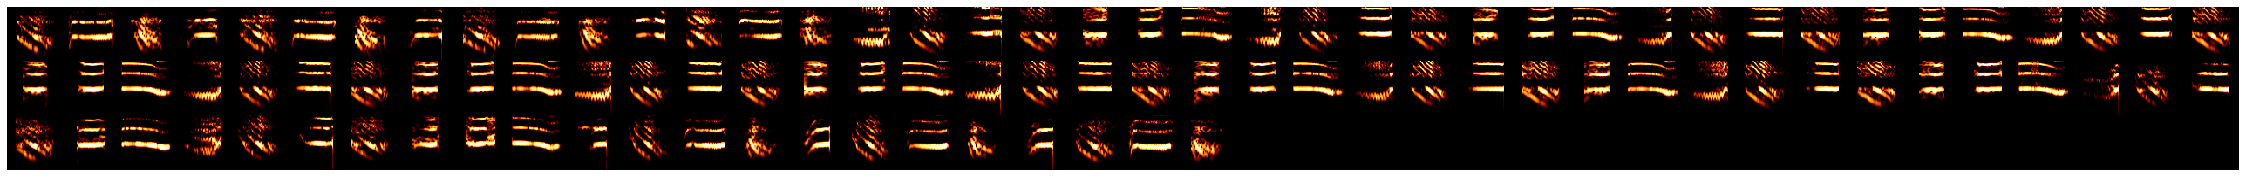

OMGO 252


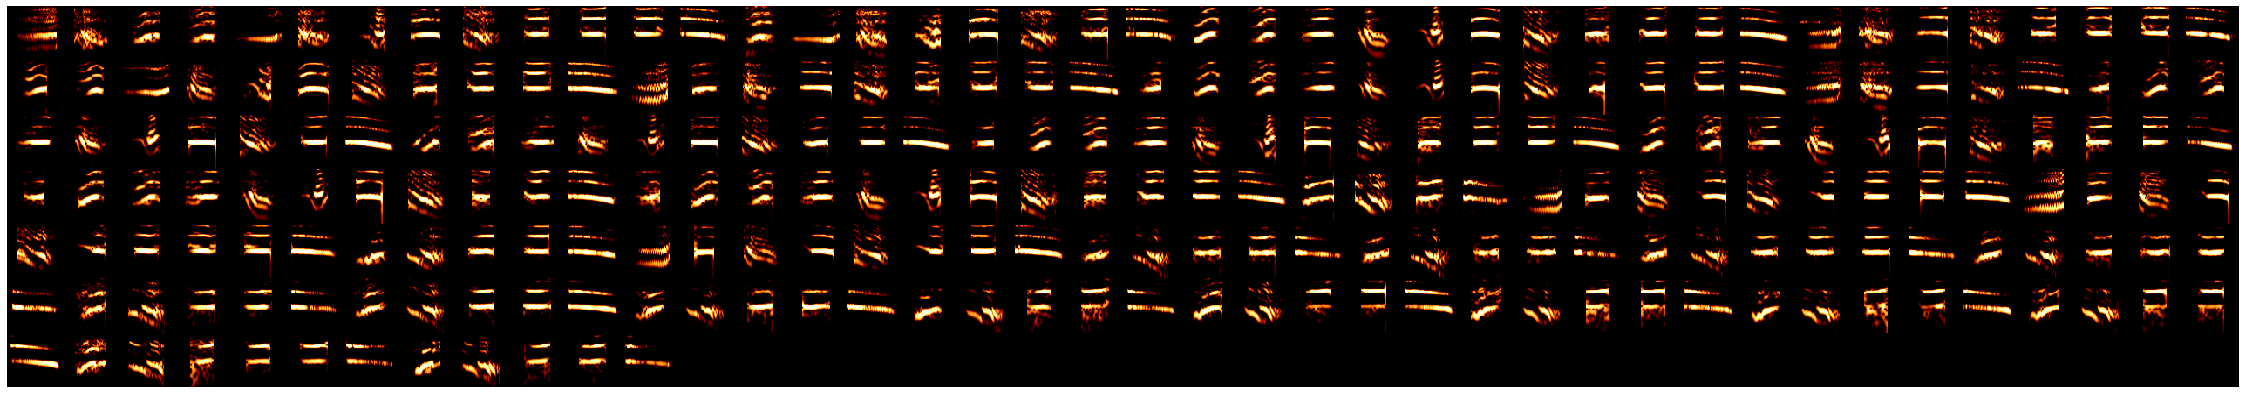

PMXRMX 19


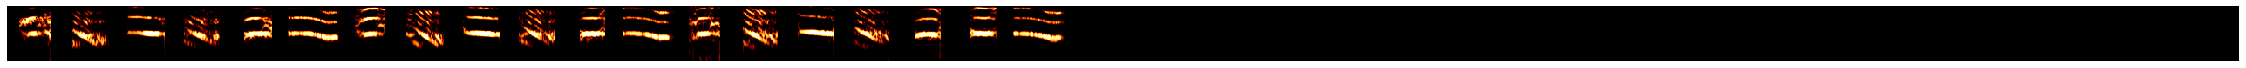

RMXGMX 75


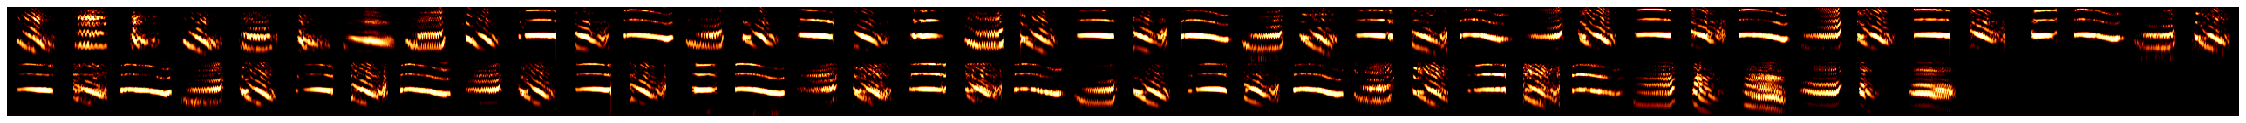

RMYG 44


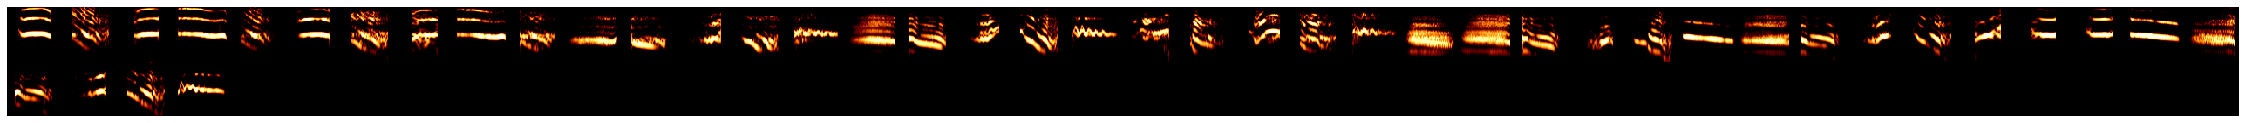

RYMR 11


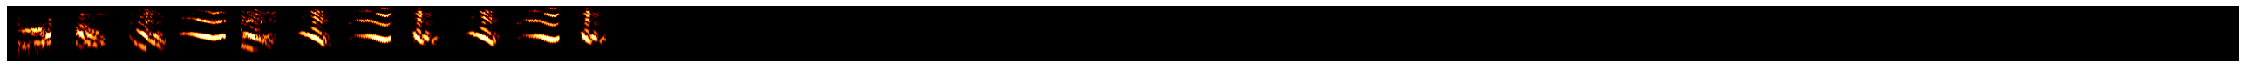

SCL XF 20-21 39


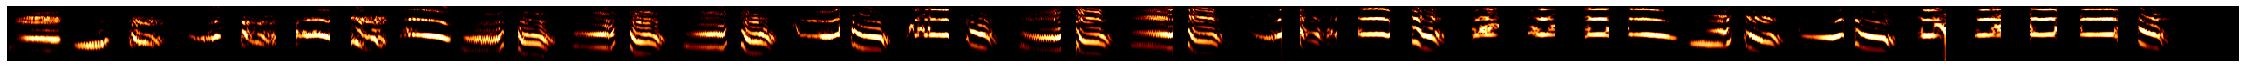

SCL XM 20-21 16


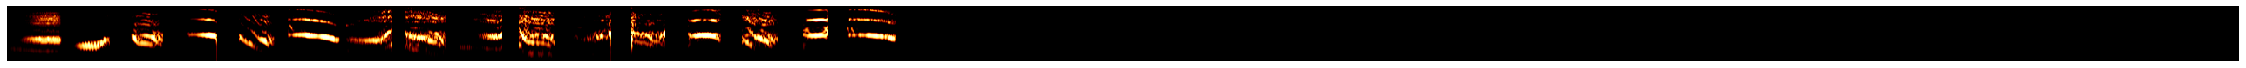

VVOM 78


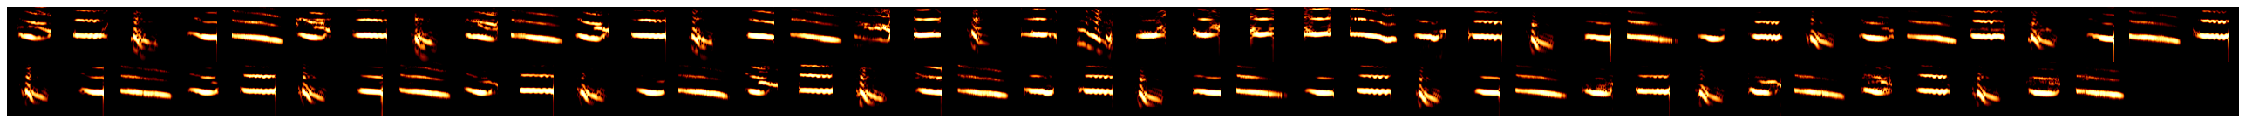

VVVM 349


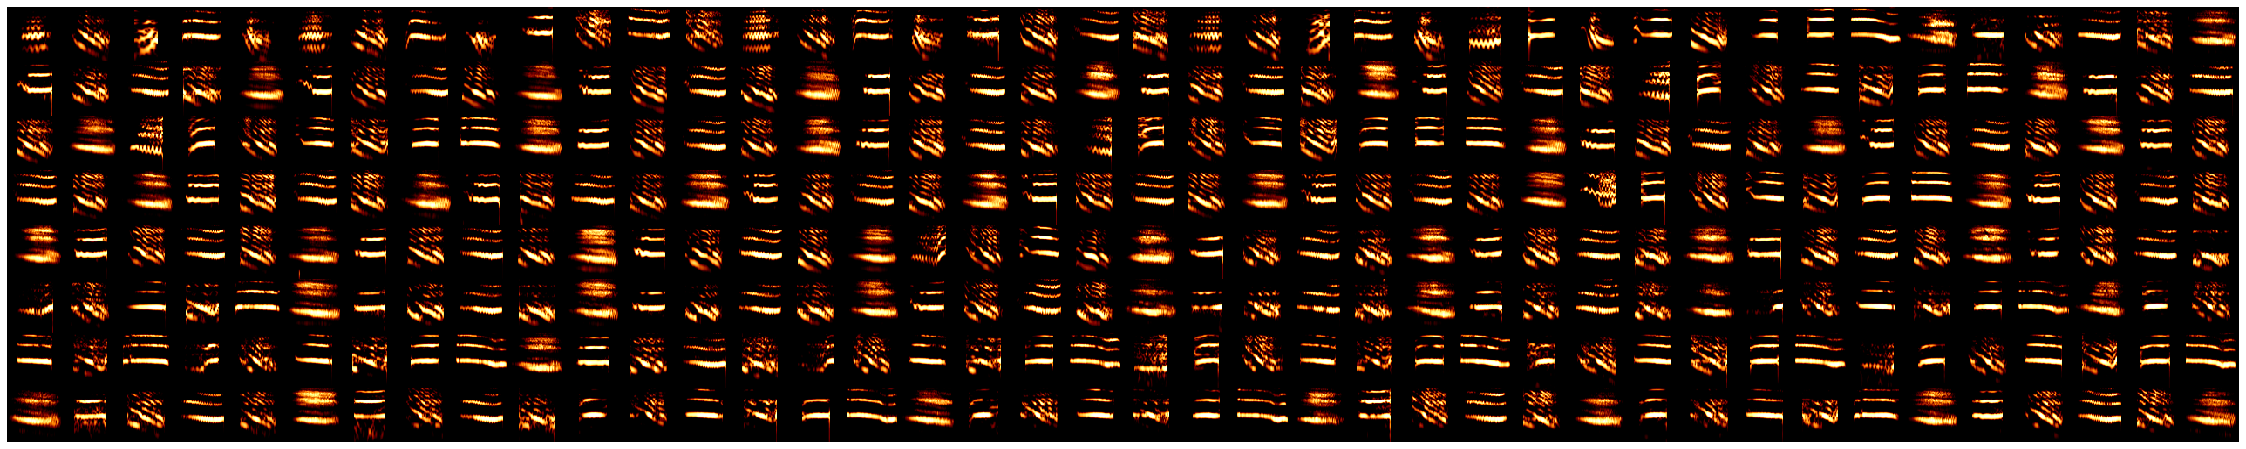

XF 20-21 31


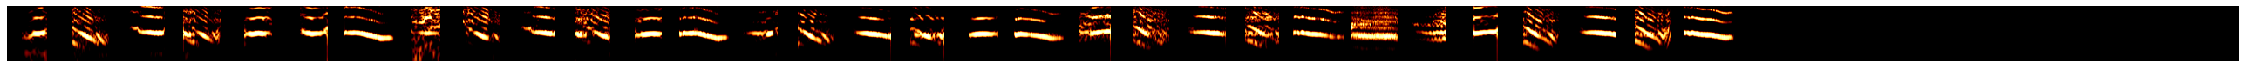

In [8]:
for indv in np.sort(seg_df.indv.unique()[:]):
    print(indv, np.sum(seg_df.indv == indv))
    specs = np.array([i/np.max(i) for i in seg_df[seg_df.indv == indv].specs.values])
    specs[specs<0] = 0
    draw_spec_set(specs, zoom=1,
                  maxrows=8, 
                  colsize=40)
    plt.show()

In [9]:
#How may combis does each individual have?
label_dfs = []
for indv in np.sort(seg_df.indv.unique()):
    label_df = pd.DataFrame({len(seg_df[seg_df.indv == indv].combi_unique_num.unique())})
    label_df.insert(0, 'indv', indv)
    label_dfs.append(label_df)
l_df = pd.concat(label_dfs)
l_df.sort_values(by=['indv'])
l_df[:]

indv   0
0          BMYO  14
0          GBYM  16
0  GON XF 19-21   6
0  GON XM 20-21   3
0          MGGY  12
0          MOGO  12
0          MOOO   6
0          MORP   4
0          MOVY   5
0          MRGO  14
0          MXWW   9
0        MXXBYX   1
0        MXXGRY  18
0          OMGO  33
0        PMXRMX   3
0        RMXGMX  16
0          RMYG   9
0          RYMR   3
0  SCL XF 20-21   4
0  SCL XM 20-21   2
0          VVOM  14
0          VVVM  64
0      XF 20-21   5

In [10]:
#How many calls does each individual have?
label_dfs = []
for indv in np.sort(seg_df.indv.unique()):
    label_df = pd.DataFrame({len(seg_df[seg_df.indv == indv].call_unique_num.unique())})
    label_df.insert(0, 'indv', indv)
    label_dfs.append(label_df)
l_df = pd.concat(label_dfs)
l_df.sort_values(by=['indv'])
l_df[:]

indv    0
0          BMYO   37
0          GBYM   33
0  GON XF 19-21   15
0  GON XM 20-21    6
0          MGGY   32
0          MOGO   40
0          MOOO   13
0          MORP   11
0          MOVY   10
0          MRGO   44
0          MXWW   23
0        MXXBYX    2
0        MXXGRY   36
0          OMGO   80
0        PMXRMX    7
0        RMXGMX   40
0          RMYG   19
0          RYMR    7
0  SCL XF 20-21   16
0  SCL XM 20-21    8
0          VVOM   30
0          VVVM  175
0      XF 20-21   13

In [11]:
#How many segments does each individual have?
label_dfs = []
for indv in np.sort(seg_df.indv.unique()):
    label_df = pd.DataFrame({len(seg_df[seg_df.indv == indv].ID.unique())})
    label_df.insert(0, 'indv', indv)
    label_dfs.append(label_df)
l_df = pd.concat(label_dfs)
l_df.sort_values(by=['indv'])
l_df[:]

indv    0
0          BMYO   84
0          GBYM   79
0  GON XF 19-21   36
0  GON XM 20-21   10
0          MGGY   79
0          MOGO  104
0          MOOO   29
0          MORP   16
0          MOVY   20
0          MRGO  125
0          MXWW   43
0        MXXBYX    3
0        MXXGRY  102
0          OMGO  252
0        PMXRMX   19
0        RMXGMX   75
0          RMYG   44
0          RYMR   11
0  SCL XF 20-21   39
0  SCL XM 20-21   16
0          VVOM   78
0          VVVM  349
0      XF 20-21   31

In [12]:
len(seg_df.call_unique_num.unique())

697

In [13]:
len(seg_df.combi_unique_num.unique())

273

In [14]:
len(seg_df)

1644

### Have a closer look at the data and assess which individuals have the highest counts

Text(0.5, 1.0, 'min')

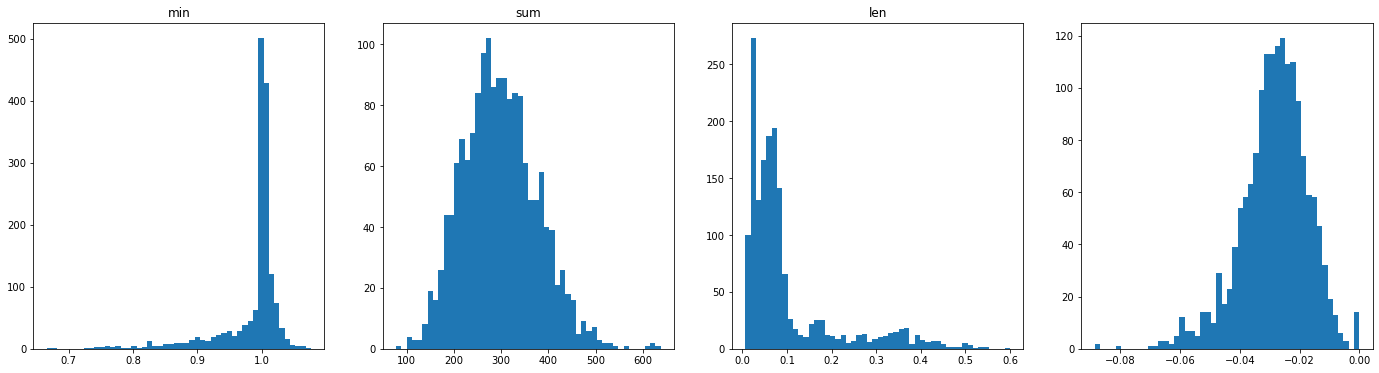

In [12]:
fig, axs = plt.subplots(ncols=4, figsize=(24,6))
axs[0].hist([np.max(i) for i in seg_df.specs.values], bins=50);axs[0].set_title('max')
axs[1].hist([np.sum(i) for i in seg_df.specs.values], bins=50);axs[1].set_title('sum')
axs[2].hist((seg_df.end_time - seg_df.start_time), bins = 50); axs[2].set_title('len')
axs[3].hist([np.min(i) for i in seg_df.specs.values], bins=50);axs[0].set_title('min')

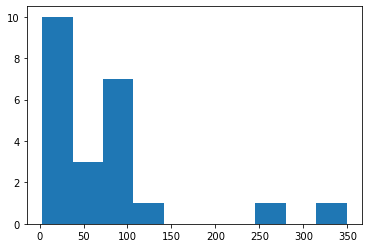

In [13]:
plt.hist([np.sum(seg_df.indv == i) for i in seg_df.indv.unique()]);

In [14]:
top_indvs = (
    pd.DataFrame(
        {i: [np.sum(seg_df.indv.values == i)] for i in seg_df.indv.unique()}
    )
    .T.sort_values(by=0, ascending=False)[:15]
    .T
)
top_indvs

VVVM  OMGO  MRGO  MOGO  MXXGRY  BMYO  MGGY  GBYM  VVOM  RMXGMX  RMYG  MXWW  \
0   349   252   125   104     102    84    79    79    78      75    44    43   

   SCL XF 20-21  GON XF 19-21  XF 20-21  
0            39            36        31

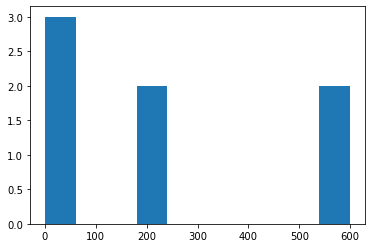

In [15]:
plt.hist([np.sum(seg_df.labels == i) for i in seg_df.labels.unique()]);

In [16]:
pd.DataFrame({i:[np.sum(seg_df.labels == i)] for i in seg_df.labels.unique()})

DS   SH   LH  US   C   NL  HL
0  570  599  229   9  23  213   1

#### Need to fix mistake in data: should be HL instead of C

In [17]:
#find out unique call labels for segments labelled C
seg_df['call_label'].loc[seg_df['labels'] == 'C'].unique()

array(['USC', 'C', 'SHC'], dtype=object)

In [18]:
#find out unique combi labels for segments labelled C
seg_df['combi_label'].loc[seg_df['labels'] == 'C'].unique()

array(['DS USC', 'NLDS C', 'SHSHDS SHC',
       'SHSHDS SHC NLSHDS SHDSSHSHSHSHLH', 'SHDS SHC'], dtype=object)

In [19]:
#fix segment labels first
##place a condition on all segments labelled C
condC = seg_df['labels'] == 'C'

In [20]:
#change segment label to HL
seg_df.loc[condC, 'labels'] = 'HL'

In [21]:
#now fix call labels
cond1 = seg_df['call_label'] == 'USC'
cond2 = seg_df['call_label'] == 'C'
cond3 = seg_df['call_label'] == 'SHC'

In [22]:
seg_df.loc[cond1, 'call_label'] = 'USHL'
seg_df.loc[cond2, 'call_label'] = 'HL'
seg_df.loc[cond3, 'call_label'] = 'SHHL'

In [23]:
#now fix combi labels
cond1 = seg_df['combi_label'] == 'DS USC'
cond2 = seg_df['combi_label'] == 'NLDS C'
cond3 = seg_df['combi_label'] == 'SHSHDS SHC'
cond4 = seg_df['combi_label'] == 'SHSHDS SHC NLSHDS SHDSSHSHSHSHLH'
cond5 = seg_df['combi_label'] == 'SHDS SHC'

In [24]:
seg_df.loc[cond1, 'combi_label'] = 'DS USHL'
seg_df.loc[cond2, 'combi_label'] = 'NLDS HL'
seg_df.loc[cond3, 'combi_label'] = 'SHSHDS SHHL'
seg_df.loc[cond4, 'combi_label'] = 'SHSHDS SHHL NLSHDS SHDSSHSHSHSHLH'
seg_df.loc[cond5, 'combi_label'] = 'SHDS SHHL'

In [25]:
##check segment labels
pd.DataFrame({i:[np.sum(seg_df.labels == i)] for i in seg_df.labels.unique()})

DS   SH   LH  US  HL   NL
0  570  599  229   9  24  213

In [26]:
#check call labels
seg_df['call_label'].loc[seg_df['labels'] == 'C']

Series([], Name: call_label, dtype: object)

In [27]:
#check those call labels have been changed to HL
seg_df['call_label'].loc[seg_df['labels'] == 'HL'].unique()

array(['USHL', 'HL', 'SHDSSHSHLH', 'SHHL'], dtype=object)

In [28]:
#and combi
seg_df['combi_label'].loc[seg_df['labels'] == 'C']

Series([], Name: combi_label, dtype: object)

In [29]:
#check those call labels have been changed to HL
seg_df['combi_label'].loc[seg_df['labels'] == 'HL'].unique()

array(['DS USHL', 'NLDS HL', 'NLSHDS SHDSSHSHLH', 'SHSHDS SHHL',
       'SHSHDS SHHL NLSHDS SHDSSHSHSHSHLH', 'SHDS SHHL'], dtype=object)

#### Now check number of segments per individual

In [30]:
label_dfs = []
for indv in np.sort(seg_df.indv.unique()):
    label_df = pd.DataFrame({i:[np.sum(seg_df[seg_df.indv == indv].labels == i)] for i in seg_df[seg_df.indv == indv].labels.unique()})
    label_df.insert(0, 'indv', indv)
    label_dfs.append(label_df)
l_df = pd.concat(label_dfs)
l_df.sort_values(by=['indv'])
l_df[:]

indv    NL   DS    LH     SH   US    HL
0          BMYO  10.0   43  13.0   17.0  1.0   NaN
0          GBYM  15.0   18   8.0   30.0  NaN   8.0
0  GON XF 19-21   2.0    9   6.0   19.0  NaN   NaN
0  GON XM 20-21   3.0    5   1.0    1.0  NaN   NaN
0          MGGY   7.0   31  10.0   29.0  1.0   1.0
0          MOGO  18.0   36   9.0   40.0  1.0   NaN
0          MOOO   1.0   13   6.0    5.0  4.0   NaN
0          MORP   3.0    9   4.0    NaN  NaN   NaN
0          MOVY   5.0   10   5.0    NaN  NaN   NaN
0          MRGO  10.0   41  12.0   62.0  NaN   NaN
0          MXWW   9.0   22   4.0    8.0  NaN   NaN
0        MXXBYX   2.0    1   NaN    NaN  NaN   NaN
0        MXXGRY  11.0   36  18.0   37.0  NaN   NaN
0          OMGO  11.0   62  33.0  146.0  NaN   NaN
0        PMXRMX   NaN    6   3.0   10.0  NaN   NaN
0        RMXGMX  19.0   30  11.0   15.0  NaN   NaN
0          RMYG   7.0   16   8.0   13.0  NaN   NaN
0          RYMR   1.0    7   3.0    NaN  NaN   NaN
0  SCL XF 20-21  10.0   15   5.0    9.0  NaN   NaN
0  SCL XM 20-21   4.0    6   2.0    4.0  NaN   NaN
0          VVOM   1.0   16   1.0   46.0  NaN  14.0
0          VVVM  62.0  128  62.0   94.0  2.0   1.0
0      XF 20-21   2.0   10   5.0   14.0  NaN   NaN

In [31]:
#Check again how may combis does each individual have?
label_dfs = []
for indv in np.sort(seg_df.indv.unique()):
    label_df = pd.DataFrame({len(seg_df[seg_df.indv == indv].combi_unique_num.unique())})
    label_df.insert(0, 'indv', indv)
    label_dfs.append(label_df)
l_df = pd.concat(label_dfs)
l_df.sort_values(by=['indv'])
l_df[:]

indv   0
0          BMYO  14
0          GBYM  16
0  GON XF 19-21   6
0  GON XM 20-21   3
0          MGGY  12
0          MOGO  12
0          MOOO   6
0          MORP   4
0          MOVY   5
0          MRGO  14
0          MXWW   9
0        MXXBYX   1
0        MXXGRY  18
0          OMGO  33
0        PMXRMX   3
0        RMXGMX  16
0          RMYG   9
0          RYMR   3
0  SCL XF 20-21   4
0  SCL XM 20-21   2
0          VVOM  14
0          VVVM  64
0      XF 20-21   5

Need to reduce
- VVVM combis
- OMGO combis

## OMGO Reduce Segment Numbers
- NL segment count okay so going to reduce number of OMGO combinations (that don't include NL)
- first create dataframe of OMGO sequences
- reduce by random selection of unique combinations

In [32]:
OMGO_df = seg_df.loc[(seg_df["indv"]=="OMGO")]
OMGO_df[:3]

start_time   end_time labels   ID  start_times  end_times call_label  \
0   12.167358  12.337176     NL  724    12.167358  12.337176       NLDS   
1   12.346987  12.395739     DS  725    12.346987  12.395739       NLDS   
2   12.607988  12.631858     SH  726    12.607988  12.631858   SHSHNLDS   

   call_start  seg_pos_call  call_unique_num  ...  indv indvi  \
0   12.167358             0              300  ...  OMGO     0   
1   12.167358             1              300  ...  OMGO     0   
2   12.607988             0              301  ...  OMGO     0   

                                        filename  group  location sex  \
0  MBG OMGO Alert and Combo Series 1 200220 AM b    MBG   CRAWLEY   F   
1  MBG OMGO Alert and Combo Series 1 200220 AM b    MBG   CRAWLEY   F   
2  MBG OMGO Alert and Combo Series 1 200220 AM b    MBG   CRAWLEY   F   

                                             wav_loc  \
0  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
1  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
2  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   

                                             key   rate  \
0  MBG OMGO Alert and Combo Series 1 200220 AM b  44100   
1  MBG OMGO Alert and Combo Series 1 200220 AM b  44100   
2  MBG OMGO Alert and Combo Series 1 200220 AM b  44100   

                                               specs  
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  

[3 rows x 25 columns]

In [33]:
combis = [i for i in OMGO_df.combi_unique_num.unique()]
df = pd.DataFrame(combis)
df = df.astype(int)
len(df)

33

In [34]:
OMGO_df["combi_label"].unique()

array(['NLDS SHSHNLDS DSSHDS SHSHSHLH', 'SHNLDS DSSHDS SHLH',
       'SHSHSHDS DSSHDSSHSHSHLH', 'NLDS SHDS SHSHSHLH',
       'SHSHNLDS DSSHDS SHSHSHLH', 'NLSHDS SHDS SHSHSHLH',
       'SHSHSHSHDS DSSHDS SHSHSHLH', 'NLDS SHDS LH',
       'SHSHSHSHDS DSSHDS SHLH', 'SHSHSHDS DSSHDS SHSHLH',
       'SHSHSHSHDS DSSHDSSHSHSHLH', 'SHSHSHDS DSSHDSSHLH',
       'SHSHSHSHDS DSSHDS SHSHLH', 'SHDS SHLH', 'NLSHDS SHDS SHSHSHSHLH',
       'NLDS SHSHLH', 'NLSHDS SHDS SHSHLH', 'SHDS SHSHLH',
       'SHDS SHSHSHLH'], dtype=object)

In [35]:
len(OMGO_df)

252

In [36]:
NLcombis = np.array(['NLDS SHSHNLDS DSSHDS SHSHSHLH', 'SHNLDS DSSHDS SHLH', 'NLDS SHDS SHSHSHLH', 'SHSHNLDS DSSHDS SHSHSHLH', 'NLSHDS SHDS SHSHSHLH', 'NLDS SHDS LH', 'NLSHDS SHDS SHSHSHSHLH', 'NLDS SHSHLH', 'NLSHDS SHDS SHSHLH'])
NLcombis

array(['NLDS SHSHNLDS DSSHDS SHSHSHLH', 'SHNLDS DSSHDS SHLH',
       'NLDS SHDS SHSHSHLH', 'SHSHNLDS DSSHDS SHSHSHLH',
       'NLSHDS SHDS SHSHSHLH', 'NLDS SHDS LH', 'NLSHDS SHDS SHSHSHSHLH',
       'NLDS SHSHLH', 'NLSHDS SHDS SHSHLH'], dtype='<U29')

In [37]:
##subset dataframe of combis if label is in array on sequences with NL
OMGONL_df = OMGO_df.loc[OMGO_df.combi_label.isin(NLcombis)]  
OMGONL_df[:2]

start_time   end_time labels   ID  start_times  end_times call_label  \
0   12.167358  12.337176     NL  724    12.167358  12.337176       NLDS   
1   12.346987  12.395739     DS  725    12.346987  12.395739       NLDS   

   call_start  seg_pos_call  call_unique_num  ...  indv indvi  \
0   12.167358             0              300  ...  OMGO     0   
1   12.167358             1              300  ...  OMGO     0   

                                        filename  group  location sex  \
0  MBG OMGO Alert and Combo Series 1 200220 AM b    MBG   CRAWLEY   F   
1  MBG OMGO Alert and Combo Series 1 200220 AM b    MBG   CRAWLEY   F   

                                             wav_loc  \
0  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
1  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   

                                             key   rate  \
0  MBG OMGO Alert and Combo Series 1 200220 AM b  44100   
1  MBG OMGO Alert and Combo Series 1 200220 AM b  44100   

                                               specs  
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  

[2 rows x 25 columns]

In [38]:
len(OMGONL_df)

86

In [39]:
#create list of combis without NL
combilist = np.array(['SHSHSHDS DSSHDSSHSHSHLH', 'SHSHSHSHDS DSSHDS SHSHSHLH', 'SHSHSHSHDS DSSHDS SHSHSHLH', 'SHSHSHSHDS DSSHDS SHLH', 'SHSHSHDS DSSHDS SHSHLH', 'SHSHSHSHDS DSSHDSSHSHSHLH', 'SHSHSHDS DSSHDSSHLH', 'SHSHSHSHDS DSSHDS SHSHLH', 'SHDS SHLH', 'SHDS SHSHLH', 'SHDS SHSHSHLH'])
combilist

array(['SHSHSHDS DSSHDSSHSHSHLH', 'SHSHSHSHDS DSSHDS SHSHSHLH',
       'SHSHSHSHDS DSSHDS SHSHSHLH', 'SHSHSHSHDS DSSHDS SHLH',
       'SHSHSHDS DSSHDS SHSHLH', 'SHSHSHSHDS DSSHDSSHSHSHLH',
       'SHSHSHDS DSSHDSSHLH', 'SHSHSHSHDS DSSHDS SHSHLH', 'SHDS SHLH',
       'SHDS SHSHLH', 'SHDS SHSHSHLH'], dtype='<U26')

In [40]:
##subset dataframe of combis if label is in array of combis without NL
OMGOreduce_df = OMGO_df.loc[OMGO_df.combi_label.isin(combilist)]  
OMGOreduce_df[:2]

start_time  end_time labels   ID  start_times  end_times call_label  \
0    0.608812  0.628624     SH  745     0.608812   0.628624   SHSHSHDS   
1    0.630067  0.651718     SH  746     0.630067   0.651718   SHSHSHDS   

   call_start  seg_pos_call  call_unique_num  ...  indv indvi  \
0    0.608812             0              307  ...  OMGO     0   
1    0.608812             1              307  ...  OMGO     0   

                           filename  group  location sex  \
0  MBG OMGO Call Combo 10 220519 PM    MBG   CRAWLEY   F   
1  MBG OMGO Call Combo 10 220519 PM    MBG   CRAWLEY   F   

                                             wav_loc  \
0  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
1  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   

                                key   rate  \
0  MBG OMGO Call Combo 10 220519 PM  44100   
1  MBG OMGO Call Combo 10 220519 PM  44100   

                                               specs  
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  

[2 rows x 25 columns]

In [41]:
#86 + 166 = 252 so all of OMGO's data is in these two dataframes
len(OMGOreduce_df)

166

In [42]:
#how many unique combis in the dataframe to be reduced
len(OMGOreduce_df.combi_unique_num.unique())

23

In [43]:
#how many unique combis in the NL combi dataframe (not to be reduced)
len(OMGONL_df.combi_unique_num.unique())

10

In [44]:
#Take random sample of unique combination numbers
samps = df.sample(frac = 0.48) 
ds = list(samps[0])
len(ds)

16

In [46]:
OMGOcombi_df = OMGOreduce_df.loc[OMGOreduce_df.combi_unique_num.isin(ds)]  ##subset dataframe of sequences if their number is in random sample
OMGOcombi_df[:2]

start_time  end_time labels   ID  start_times  end_times call_label  \
0    0.679904  0.699280     SH  833     0.679904   0.699280   SHSHSHDS   
1    0.702631  0.722127     SH  834     0.702631   0.722127   SHSHSHDS   

   call_start  seg_pos_call  call_unique_num  ...  indv indvi  \
0    0.679904             0              332  ...  OMGO     0   
1    0.679904             1              332  ...  OMGO     0   

                          filename  group  location sex  \
0  MBG OMGO Call Combo 7 220519 PM    MBG   CRAWLEY   F   
1  MBG OMGO Call Combo 7 220519 PM    MBG   CRAWLEY   F   

                                             wav_loc  \
0  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
1  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   

                               key   rate  \
0  MBG OMGO Call Combo 7 220519 PM  44100   
1  MBG OMGO Call Combo 7 220519 PM  44100   

                                               specs  
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  

[2 rows x 25 columns]

In [47]:
len(OMGOcombi_df)

71

In [48]:
#attach to dataframe with other OMGO segments
frames = [OMGONL_df, OMGOcombi_df]
OMGO_df2 = pd.concat(frames)
OMGO_df2

start_time    end_time labels   ID  start_times   end_times call_label  \
0    12.167358   12.337176     NL  724    12.167358   12.337176       NLDS   
1    12.346987   12.395739     DS  725    12.346987   12.395739       NLDS   
2    12.607988   12.631858     SH  726    12.607988   12.631858   SHSHNLDS   
3    12.636243   12.656856     SH  727    12.636243   12.656856   SHSHNLDS   
4    12.662557   12.912456     NL  728    12.662557   12.912456   SHSHNLDS   
..         ...         ...    ...  ...          ...         ...        ...   
63  132.321304  132.386061     DS  966   132.321304  132.386061       SHDS   
64  132.411305  132.426545     SH  967   132.411305  132.426545   SHSHSHLH   
65  132.438908  132.455392     SH  968   132.438908  132.455392   SHSHSHLH   
66  132.462457  132.486594     SH  969   132.462457  132.486594   SHSHSHLH   
67  132.486594  132.690089     LH  970   132.486594  132.690089   SHSHSHLH   

    call_start  seg_pos_call  call_unique_num  ...  indv indvi  \
0    12.167358             0              300  ...  OMGO     0   
1    12.167358             1              300  ...  OMGO     0   
2    12.607988             0              301  ...  OMGO     0   
3    12.607988             1              301  ...  OMGO     0   
4    12.607988             2              301  ...  OMGO     0   
..         ...           ...              ...  ...   ...   ...   
63  132.282615             1              376  ...  OMGO     0   
64  132.411305             0              377  ...  OMGO     0   
65  132.411305             1              377  ...  OMGO     0   
66  132.411305             2              377  ...  OMGO     0   
67  132.411305             3              377  ...  OMGO     0   

                                             filename  group  location sex  \
0       MBG OMGO Alert and Combo Series 1 200220 AM b    MBG   CRAWLEY   F   
1       MBG OMGO Alert and Combo Series 1 200220 AM b    MBG   CRAWLEY   F   
2       MBG OMGO Alert and Combo Series 1 200220 AM b    MBG   CRAWLEY   F   
3       MBG OMGO Alert and Combo Series 1 200220 AM b    MBG   CRAWLEY   F   
4       MBG OMGO Alert and Combo Series 1 200220 AM b    MBG   CRAWLEY   F   
..                                                ...    ...       ...  ..   
63  R05_0009_MBG BMXX Beg Series 1 OMGO Discrete C...    MBG   CRAWLEY   F   
64  R05_0009_MBG BMXX Beg Series 1 OMGO Discrete C...    MBG   CRAWLEY   F   
65  R05_0009_MBG BMXX Beg Series 1 OMGO Discrete C...    MBG   CRAWLEY   F   
66  R05_0009_MBG BMXX Beg Series 1 OMGO Discrete C...    MBG   CRAWLEY   F   
67  R05_0009_MBG BMXX Beg Series 1 OMGO Discrete C...    MBG   CRAWLEY   F   

                                              wav_loc  \
0   C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
1   C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
2   C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
3   C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
4   C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
..                                                ...   
63  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
64  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
65  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
66  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
67  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   

                                                  key   rate  \
0       MBG OMGO Alert and Combo Series 1 200220 AM b  44100   
1       MBG OMGO Alert and Combo Series 1 200220 AM b  44100   
2       MBG OMGO Alert and Combo Series 1 200220 AM b  44100   
3       MBG OMGO Alert and Combo Series 1 200220 AM b  44100   
4       MBG OMGO Alert and Combo Series 1 200220 AM b  44100   
..                                                ...    ...   
63  R05_0009_MBG BMXX Beg Series 1 OMGO Discrete C...  44100   
64  R05_0009_MBG BMXX Beg Series 1 OMGO Discrete C...  44100   
65  R05_0009_MBG BMXX Beg Series 1 OMGO Discrete C...  44100   
66  R05_0009

In [49]:
#number of rows in original df
len(OMGO_df)

252

In [50]:
#check this is reduced
len(OMGO_df2)

157

In [51]:
#check number of unique combis
len(OMGO_df2.combi_unique_num.unique())

21

In [52]:
#check number of unique calls
len(OMGO_df2.call_unique_num.unique())

52

In [53]:
#check number of segments
label_dfs = []
for indv in np.sort(OMGO_df2.indv.unique()):
    label_df = pd.DataFrame({i:[np.sum(OMGO_df2[OMGO_df2.indv == indv].labels == i)] for i in OMGO_df2[OMGO_df2.indv == indv].labels.unique()})
    label_df.insert(0, 'indv', indv)
    label_dfs.append(label_df)
l_df = pd.concat(label_dfs)
l_df.sort_values(by=['indv'])
l_df[:]

indv  NL  DS  SH  LH
0  OMGO  11  38  87  21

## Now do same for VVVM segments

In [54]:
VVVM_df = seg_df.loc[(seg_df["indv"]=="VVVM")]
VVVM_df[:2]

start_time  end_time labels    ID  start_times  end_times call_label  \
0    5.113492  5.157056     NL  1095     5.113492   5.157056         NL   
1    5.168242  5.257137     DS  1096     5.168242   5.257137         DS   

   call_start  seg_pos_call  call_unique_num  ...  indv indvi  \
0    5.113492             0              439  ...  VVVM     0   
1    5.168242             0              440  ...  VVVM     0   

                                           filename  group   location sex  \
0  RVD VVVM Aerial Predator Call series 1 051120 AM    RVD  GUILDFORD   F   
1  RVD VVVM Aerial Predator Call series 1 051120 AM    RVD  GUILDFORD   F   

                                             wav_loc  \
0  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
1  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   

                                                key   rate  \
0  RVD VVVM Aerial Predator Call series 1 051120 AM  44100   
1  RVD VVVM Aerial Predator Call series 1 051120 AM  44100   

                                               specs  
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  

[2 rows x 25 columns]

In [55]:
combis = [i for i in VVVM_df.combi_unique_num.unique()]
df = pd.DataFrame(combis)  #dataframe of unique combi numbers
df = df.astype(int) #change dataframe to integer type
samp = df.sample(frac = 0.39) ##random sample from dataframe (65%)
ds = list(samp[0])
len(ds)

25

In [56]:
len(VVVM_df)

349

In [58]:
VVVM_df2 = VVVM_df.loc[VVVM_df.combi_unique_num.isin(ds)]  ##subset dataframe of sequences if their number is in random sample
len(VVVM_df2)

133

In [60]:
label_dfs = []
for indv in np.sort(VVVM_df2.indv.unique()):
    label_df = pd.DataFrame({i:[np.sum(VVVM_df2[VVVM_df2.indv == indv].labels == i)] for i in VVVM_df2[VVVM_df2.indv == indv].labels.unique()})
    label_df.insert(0, 'indv', indv)
    label_dfs.append(label_df)
l_df = pd.concat(label_dfs)
l_df.sort_values(by=['indv'])
l_df[:]

indv  NL  DS  LH  SH  HL
0  VVVM  22  50  24  36   1

In [61]:
len(VVVM_df2.call_unique_num.unique())

67

In [62]:
len(VVVM_df2.combi_unique_num.unique())

25

### attach OMGO & VVVM to other dataframes

In [63]:
other_df = seg_df[seg_df["indv"].isin(["OMGO", "VVVM"])==False] #without VVVM or OMGO
other_df.indv.unique()

array(['MGGY', 'MRGO', 'MOVY', 'RYMR', 'BMYO', 'MORP', 'GON XF 19-21',
       'GON XM 20-21', 'GBYM', 'MOGO', 'MOOO', 'XF 20-21', 'RMYG',
       'MXXBYX', 'MXXGRY', 'PMXRMX', 'RMXGMX', 'MXWW', 'SCL XF 20-21',
       'SCL XM 20-21', 'VVOM'], dtype=object)

In [64]:
len(other_df.indv.unique())

21

In [65]:
len(seg_df.indv.unique())

23

In [66]:
frames = [other_df, VVVM_df2, OMGO_df2]
seg_df2 = pd.concat(frames)

In [67]:
seg_df2[:2]

start_time  end_time labels  ID  start_times  end_times call_label  \
0    0.753604  0.776773     DS   0     0.753604   0.776773     DSSHDS   
1    0.786865  0.835165     SH   1     0.786865   0.835165     DSSHDS   

   call_start  seg_pos_call  call_unique_num  ...  indv indvi  \
0    0.753604             0                0  ...  MGGY     0   
1    0.753604             1                0  ...  MGGY     0   

                          filename  group  location sex  \
0  BWY MGGY Call Combo 1 290719 PM   BWYa   CRAWLEY   F   
1  BWY MGGY Call Combo 1 290719 PM   BWYa   CRAWLEY   F   

                                             wav_loc  \
0  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
1  C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   

                               key   rate  \
0  BWY MGGY Call Combo 1 290719 PM  44100   
1  BWY MGGY Call Combo 1 290719 PM  44100   

                                               specs  
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  

[2 rows x 25 columns]

In [68]:
len(seg_df2)

1333

In [69]:
len(seg_df)

1644

## Sort Dataframe

In [70]:
seg_df2.sort_values(by=['ID'])

start_time  end_time labels    ID  start_times  end_times call_label  \
0     0.753604  0.776773     DS     0     0.753604   0.776773     DSSHDS   
1     0.786865  0.835165     SH     1     0.786865   0.835165     DSSHDS   
2     0.855941  0.921160     DS     2     0.855941   0.921160     DSSHDS   
3     0.932017  0.942875     SH     3     0.932017   0.942875     SHSHLH   
4     0.951561  0.980101     SH     4     0.951561   0.980101     SHSHLH   
..         ...       ...    ...   ...          ...        ...        ...   
7     1.378323  1.415477     DS  1642     1.378323   1.415477       LHDS   
0     0.112036  0.138211     SH  1643     0.112036   0.138211       SHDS   
1     0.158824  0.238986     DS  1644     0.158824   0.238986       SHDS   
2     0.295263  0.474563     LH  1645     0.295263   0.474563       LHDS   
3     0.478490  0.512518     DS  1646     0.478490   0.512518       LHDS   

    call_start  seg_pos_call  call_unique_num  ...    indv indvi  \
0     0.753604             0                0  ...    MGGY     0   
1     0.753604             1                0  ...    MGGY     0   
2     0.753604             2                0  ...    MGGY     0   
3     0.932017             0                1  ...    MGGY     0   
4     0.932017             1                1  ...    MGGY     0   
..         ...           ...              ...  ...     ...   ...   
7     1.218702             1              696  ...  MXXGRY     0   
0     0.112036             0              697  ...  MXXGRY     0   
1     0.112036             1              697  ...  MXXGRY     0   
2     0.295263             0              698  ...  MXXGRY     0   
3     0.295263             1              698  ...  MXXGRY     0   

                                             filename  group   location sex  \
0                     BWY MGGY Call Combo 1 290719 PM   BWYa    CRAWLEY   F   
1                     BWY MGGY Call Combo 1 290719 PM   BWYa    CRAWLEY   F   
2                     BWY MGGY Call Combo 1 290719 PM   BWYa    CRAWLEY   F   
3                     BWY MGGY Call Combo 1 290719 PM   BWYa    CRAWLEY   F   
4                     BWY MGGY Call Combo 1 290719 PM   BWYa    CRAWLEY   F   
..                                                ...    ...        ...  ..   
7   SS MXXGRY XXXX JUVENILE Call Combination Serie...     SS  GUILDFORD   F   
0   SS MXXGRY XXXX JUVENILE Call Combination Serie...     SS  GUILDFORD   F   
1   SS MXXGRY XXXX JUVENILE Call Combination Serie...     SS  GUILDFORD   F   
2   SS MXXGRY XXXX JUVENILE Call Combination Serie...     SS  GUILDFORD   F   
3   SS MXXGRY XXXX JUVENILE Call Combination Serie...     SS  GUILDFORD   F   

                                              wav_loc  \
0   C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
1   C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
2   C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
3   C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
4   C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
..                                                ...   
7   C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
0   C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
1   C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
2   C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   
3   C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...   

                                                  key   rate  \
0                     BWY MGGY Call Combo 1 290719 PM  44100   
1                     BWY MGGY Call Combo 1 290719 PM  44100   
2                     BWY MGGY Call Combo 1 290719 PM  44100   
3                     BWY MGGY Call Combo 1 290719 PM  44100   
4                     BWY MGGY Call Combo 1 290719 PM  44100   
..                                                ...    ...   
7   SS MXXGRY XXXX JUVENILE Call Combination Serie...  44100   
0   SS MXXGRY XXXX JUVENILE Call Combination Serie...  44100   
1   SS MXXGRY XXXX JUVENILE Call Combination Serie...  44100   


## Have another look at the data

In [71]:
pd.DataFrame({i:[np.sum(seg_df2.indv == i)] for i in seg_df2.indv.unique()})

MGGY  MRGO  MOVY  RYMR  BMYO  MORP  GON XF 19-21  GON XM 20-21  GBYM  MOGO  \
0    79   125    20    11    84    16            36            10    79   104   

   ...  MXXBYX  MXXGRY  PMXRMX  RMXGMX  MXWW  SCL XF 20-21  SCL XM 20-21  \
0  ...       3     102      19      75    43            39            16   

   VVOM  VVVM  OMGO  
0    78   133   157  

[1 rows x 23 columns]

In [72]:
pd.DataFrame({i:[np.sum(seg_df2.labels == i)] for i in seg_df2.labels.unique()})

DS   SH   LH  US  HL   NL
0  468  482  179   7  24  173

In [73]:
#check number of segments per individual again
labels_dfs = []
for indv in np.sort(seg_df2.indv.unique()):
    labels_df = pd.DataFrame({i:[np.sum(seg_df2[seg_df2.indv == indv].labels == i)] for i in seg_df2[seg_df2.indv == indv].labels.unique()})
    labels_df.insert(0, 'indv', indv)
    labels_dfs.append(labels_df)
ls_df = pd.concat(labels_dfs)
ls_df.sort_values(by=['indv'])
ls_df[:]

indv    NL  DS    LH    SH   US    HL
0          BMYO  10.0  43  13.0  17.0  1.0   NaN
0          GBYM  15.0  18   8.0  30.0  NaN   8.0
0  GON XF 19-21   2.0   9   6.0  19.0  NaN   NaN
0  GON XM 20-21   3.0   5   1.0   1.0  NaN   NaN
0          MGGY   7.0  31  10.0  29.0  1.0   1.0
0          MOGO  18.0  36   9.0  40.0  1.0   NaN
0          MOOO   1.0  13   6.0   5.0  4.0   NaN
0          MORP   3.0   9   4.0   NaN  NaN   NaN
0          MOVY   5.0  10   5.0   NaN  NaN   NaN
0          MRGO  10.0  41  12.0  62.0  NaN   NaN
0          MXWW   9.0  22   4.0   8.0  NaN   NaN
0        MXXBYX   2.0   1   NaN   NaN  NaN   NaN
0        MXXGRY  11.0  36  18.0  37.0  NaN   NaN
0          OMGO  11.0  38  21.0  87.0  NaN   NaN
0        PMXRMX   NaN   6   3.0  10.0  NaN   NaN
0        RMXGMX  19.0  30  11.0  15.0  NaN   NaN
0          RMYG   7.0  16   8.0  13.0  NaN   NaN
0          RYMR   1.0   7   3.0   NaN  NaN   NaN
0  SCL XF 20-21  10.0  15   5.0   9.0  NaN   NaN
0  SCL XM 20-21   4.0   6   2.0   4.0  NaN   NaN
0          VVOM   1.0  16   1.0  46.0  NaN  14.0
0          VVVM  22.0  50  24.0  36.0  NaN   1.0
0      XF 20-21   2.0  10   5.0  14.0  NaN   NaN

- Some individuals still a bit higher, but all much closer to counts of others (hard to get exactly the same due to differing counts of segments per combi between individuals)

## Save pickles

In [74]:
from avgn.utils.paths import DATA_DIR, ensure_dir

In [75]:
#save reduced indvs df
save_loc = DATA_DIR / DATASET_ID / DT_ID /  'segment_df_for_umap.pickle'
ensure_dir(save_loc.as_posix())
seg_df2.to_pickle(save_loc)